<a href="https://colab.research.google.com/github/shehriar41891/Stable_Diffusion/blob/FinetuneVit/FinetuningViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the Model without Finetuning

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiFv_OXQX1-bAUtLoXebEZsXTj8I2z3yL9AA&s'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: rugby ball


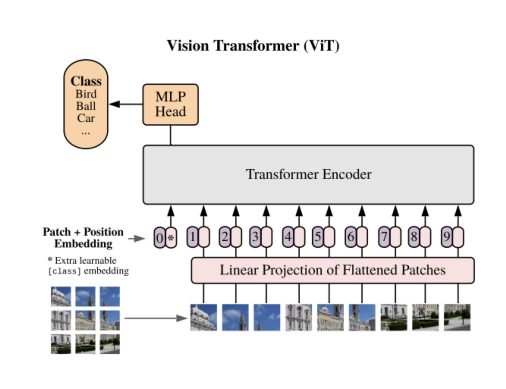

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Image URL
url = 'https://docs.nvidia.com/nemo-framework/user-guide/latest/_images/vit_arch.png'

# Load the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis for better visualization
plt.show()


# Creating ViT with Abstraction

In [ ]:
from transformers import ViTConfig, ViTModel

# Initializing a ViT vit-base-patch16-224 style configuration
configuration = ViTConfig() #we can the change value of any pre defined config right here

print(configuration)

# Initializing a model (with random weights) from the vit-base-patch16-224 style configuration
model = ViTModel(configuration)

# Accessing the model configuration
configuration = model.config

ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.44.2"
}



Here the attention_probs_dropout_prob specify the percentage of attention score we want to neglect

initializer_range: used to initialize the weight of mean 0 and std of given for the metrices of converting our vector into key,query and value

layer_norm_eps: It helps in avoiding zero division while normalizing

qkv_bias: It specifies whether to add the bais term in query,key and value vector like Q=W
Q
​
 ⋅X+b
Q
​


In [1]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiFv_OXQX1-bAUtLoXebEZsXTj8I2z3yL9AA&s'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
# print(outputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted class: rugby ball


# Kaggle Setup

In [1]:
from google.colab import files
files.upload()  # Select kaggle.json

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"shehriaralikhan","key":"bd7a45c1c0ae433e9dc301bd8f3af45e"}'}

In [2]:
import os

# Make a directory for the kaggle.json file
os.makedirs('/root/.kaggle/', exist_ok=True)

# Move the kaggle.json file to the appropriate directory
!mv /content/kaggle.json  /root/.kaggle/

# Set permissions for the file
!chmod 600 /root/.kaggle/kaggle.json

# Verify that the setup was successful by listing Kaggle datasets
!kaggle datasets list


ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                          94KB  2024-09-02 10:53:57          28771        513  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14          11002        145  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12           3645         70  1.0              
zafarali27/car-price-prediction                               Car Pric

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 345M/346M [00:18<00:00, 21.9MB/s]
100% 346M/346M [00:18<00:00, 19.4MB/s]


In [4]:
!unzip /content/intel-image-classification.zip -d /content/ > /dev/null 2>&1

# Loading the Dataset

In [5]:
from torchvision import datasets,transforms
from torch.utils.data import  DataLoader
import torch
import numpy as np

In [6]:
import os
NUM_WORKERS = os.cpu_count() #it set the number of cpu layers we got for parallel execuation


def create_dataloader(
  train_dir : str,
  test_dir : str,
  transform : transforms.Compose, # Transformations to apply to the data (e.g., resizing, normalization)
  batch_size : int,
  num_workers : int = NUM_WORKERS #number of cpu core working for loading the data
  ):

  train_data = datasets.ImageFolder(train_dir,transform=transform)
  test_data = datasets.ImageFolder(test_dir,transform=transform)

  print('Before converting into data loader',train_data)

  class_names = train_data.classes

  #turn images into dataloader
  train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True
  )

  print('After converting into data loader',train_dataloader)


  test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
  )

  return train_dataloader,test_dataloader,class_names

In [7]:
train_dir="/content/seg_train/seg_train"
test_dir="/content/seg_test/seg_test"

In [8]:
IMG_SIZE = 224
manual_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(),
])

In [9]:
BATCH_SIZE = 32
train_dataloader,test_dataloader,class_names = create_dataloader(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=BATCH_SIZE
)

Before converting into data loader Dataset ImageFolder
    Number of datapoints: 14034
    Root location: /content/seg_train/seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
After converting into data loader <torch.utils.data.dataloader.DataLoader object at 0x7d91e6173370>


# Difference between Data before and after data loader

**train_data is an instance of the datasets.ImageFolder class.
It represents the dataset as a whole, where each image in the specified directory is individually loaded and stored in a list-like format.**


**Not batched**

**train_dataloader is an instance of the DataLoader class, which wraps around train_data.
Batched: The DataLoader automatically splits the dataset into batches, as specified by the batch_size parameter. Instead of getting individual samples, you get batches of samples when iterating through the DataLoader**

# Setting Up for Finetuning

In [10]:
from transformers import ViTForImageClassification

# Load pretrained ViT model (adjust number of labels based on your dataset)
num_classes = len(class_names)
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
import torch
from torch.optim import AdamW
from transformers import get_scheduler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [12]:
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [13]:
from torch import nn, optim

loss_fn = nn.CrossEntropyLoss()

model.train()  # Put model in training mode
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    total_loss = 0
    for batch in train_dataloader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(pixel_values=inputs)
        loss = loss_fn(outputs.logits, labels)
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Average loss: {avg_loss:.4f}")

Epoch 1/3
Average loss: 0.2102
Epoch 2/3
Average loss: 0.0755
Epoch 3/3
Average loss: 0.0272
